In [43]:
import os
import h5py
import numpy as np
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
from matplotlib import colors as colors
from ptypy import io

In [2]:
data_path = "/dls/i08/data/2015/sp11038-2/processing/scan_1715.h5"

In [6]:
with h5py.File(data_path, "r") as f:
    data = f["data"][:]
    pos = f["positions"][:]
    bad = f["bad"][:]
    mask = f["mask"][:]
    sumq = f["sum"][:]
    psize = float(f["psize"][...])

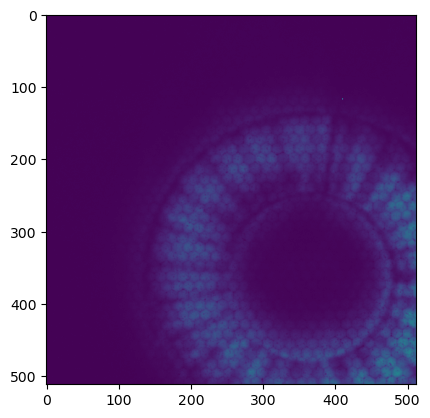

In [59]:
plt.imshow(data[0])

In [34]:
p = (pos/psize).astype(int)

In [38]:
flat = np.median(data, axis=0)

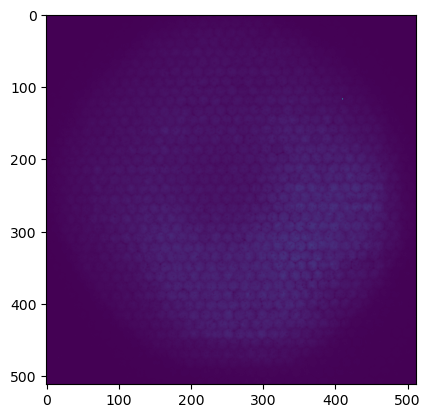

In [39]:
plt.imshow(flat)

In [26]:
%run stitching.py

In [40]:
img, flat, positions = merge_image_stack(frames=data, positions=p, flat=flat, mask=mask, refine_flat=True, max_iter=5, max_shift=20)

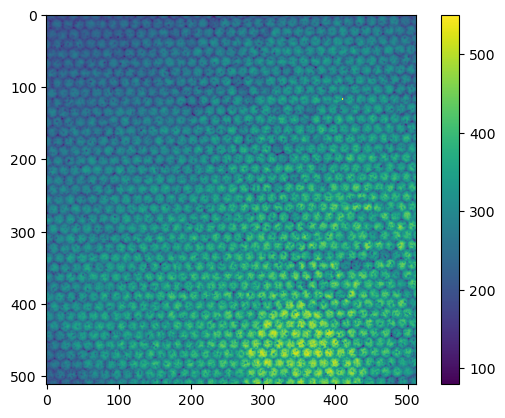

In [57]:
plt.figure()
plt.imshow(flat, vmax=550)
plt.colorbar()
plt.show()

In [60]:
with h5py.File("/dls/i08/data/2015/sp11038-2/processing/flat_20150713.h5", "r") as f:
    flat_old = f["flat"][:]

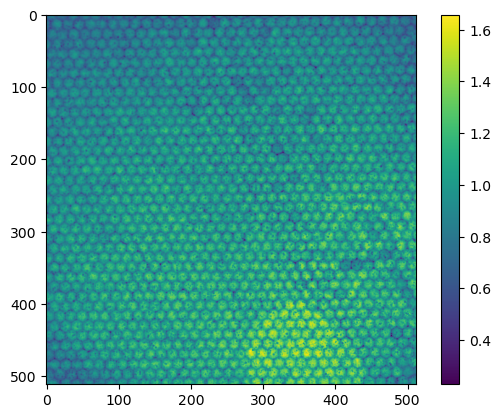

In [61]:
plt.figure()
plt.imshow(flat_old)
plt.colorbar()
plt.show()